In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [13]:
path_to_train = '../data/zip.train'
path_to_test = '../data/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_train[0].reshape(16,16))

(7291, 256)
(7291,)
[[-1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.631  0.862 -0.167
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.    -0.992  0.297  1.     0.307
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.    -0.41   1.     0.986 -0.565
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -1.    -0.683  0.825  1.     0.562 -1.
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -0.938  0.54   1.     0.778 -0.715 -1.
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.     0.1    1.     0.922 -0.439 -1.    -1.
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -0.257  0.95   1.    -0.162 -1.    -1.    -1.
  -0.987 -0.714 -0.832 -1.    -1.    -1.   ]
 [-1.    -1.    -0.797  0.909  1.     0.3   -0.961 -1.    -1.    -0.55
   0.485  0.996  0.867  0.092 -1.    -1.   ]
 [-1.    -1.     0.278  1.     0.877 -0.824 -1.    -0.905

In [15]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img =(2-sample_digits[i].reshape((16, 16)))/2*255
        plt.imshow(img, cmap='gray')
        plt.axis('off')


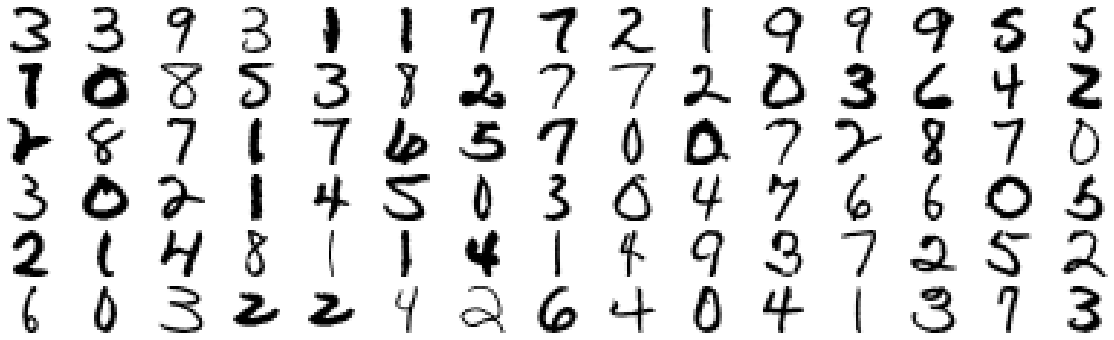

In [16]:
show_numbers(X_train)

About the dataset:
Normalized handwritten digits, automatically
scanned from envelopes by the U.S. Postal Service. The original
scanned digits are binary and of different sizes and orientations; the
images  here have been deslanted and size normalized, resulting
in 16 x 16 grayscale images (Le Cun et al., 1990).

Main guidance to deal with any ML-task: 
1. Open train and test datasets
2. Define X-axis: Features aka properties that we use for learning (independent variables)
3. Define Y-axis: Labels/Classes aka output our model should learn to produce (dependent variables)
4. Print/plot data for visual understanding

Exercise:
1. Print out the accuracy.
2. Using Matplotlib, plot some of the numbers that are classified incorrectly.
3. Which k is optimal for the accuracy?
4. What are advantages and disadvantages for the k-NN-Classifier?

In [17]:
class KNearestNeighbors():
    
    def euclidean_distance(self, x_1, x_2):
      return np.sum((x_1-x_2)**2, axis = 1)

    def fit(self, X_train, y_train):
        # using regulary ML notation
        # https://scikit-learn.org/stable/tutorial/basic/tutorial.html
        # The for classifier is first fitted to the model; that is, it must learn from the model. 
        # This is done by passing our training set to the fit method. 
        self.X = X_train
        self.y = y_train
    
    def predict(self, X_test, k):
        # Now you can predict new values. In this case, we'll predict using the ona sample from the test dataset 
        # By predicting, w’ll determine the image from the training set (LABEL) that best matches the last image
        predictions = []
        for sample in X_test:
            # getting distance for each prticular data point
            distances = self.euclidean_distance(self.X, sample)
            # getting indexes of k first minimal elements
            # elements rearranged in such a way that the value of the element in k-th position 
            # is in the position it would be in a sorted array
            #idx = distances.argsort()[-3:][::-1]
            # https://stackoverflow.com/questions/34226400/find-the-index-of-the-k-smallest-values-of-a-numpy-array
            idx = np.argpartition(distances, k)[:k]
            # taking labels by indexes
            votes = (self.y[idx]).astype(int)
            # the class with maximum votes => the class with minimal distance to k nearest neighbors
            # numpy.argmax(numpy.bincount(dlabel)) returns the most common value found in dlabel.
            predictions.append(np.argmax(np.bincount(votes, minlength=10)))
        print("Done for k = {}".format(k))
        return predictions

kNN = KNearestNeighbors()
squared_distances = kNN.euclidean_distance(X_train, X_test[0])
print(squared_distances.shape)

(7291,)


In [18]:
def calculate_accuracy(labels, predictions):
        # Accuracy refers to the closeness of a measured value to a standard or known value
        # The accuracy is the fraction of images that the model classifies correctly.
        # Because we are measuring our model’s accuracy, we have created a set of images whose contents are known.
        # That is, we have a true label for each image, which is encoded as a class-ID.
        #  Next, we can use NumPy’s vectorized logical operations, specifically ==, to get a boolean-valued array
        # that stores True wherever the predicted labels match the true labels and False everywhere else.
        # Recall that True behaves like 1 and False like 0. Thus, we can call np.mean on our resulting boolean-valued array
        # to compute the number of correct predictions divided by the total number of predictions.
        return np.mean(labels == predictions)

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

print(training_data.shape)
print(test_data.shape)

# show_numbers(X_train)

model = KNearestNeighbors()
model.fit(X_train, y_train)

neighbours = [1, 2, 3, 5, 10, 20, 40, 55, 75, 100] 
results_train = []
accuracies_train = []

results_test = []
accuracies_test = []

for k in neighbours:
    res_train = model.predict(X_train, k)
    acc_train = calculate_accuracy(y_train, res_train)
    
    res_test = model.predict(X_test, k)
    acc_test = calculate_accuracy(y_test, res_test)
    results_test.append(res_test)
    
    accuracies_train.append(acc_train)
    accuracies_test.append(acc_test)
    
    print(acc_test)
        

(7291, 258)
(2007, 257)
Done for k = 1
Done for k = 1
0.9436970602889886
Done for k = 2
Done for k = 2
0.9412057797708022
Done for k = 3
Done for k = 3
0.9446935724962631
Done for k = 5
Done for k = 5
0.9446935724962631
Done for k = 10
Done for k = 10
0.9357249626307922
Done for k = 20
Done for k = 20
0.9177877428998505
Done for k = 40
Done for k = 40
0.9033383158943697
Done for k = 55
Done for k = 55
0.8898854010961634
Done for k = 75
Done for k = 75
0.877927254608869
Done for k = 100
Done for k = 100
0.8634778276033881


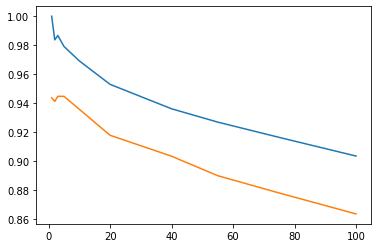

In [19]:
plt.plot(neighbours, accuracies_train)
plt.plot(neighbours, accuracies_test)
plt.show()

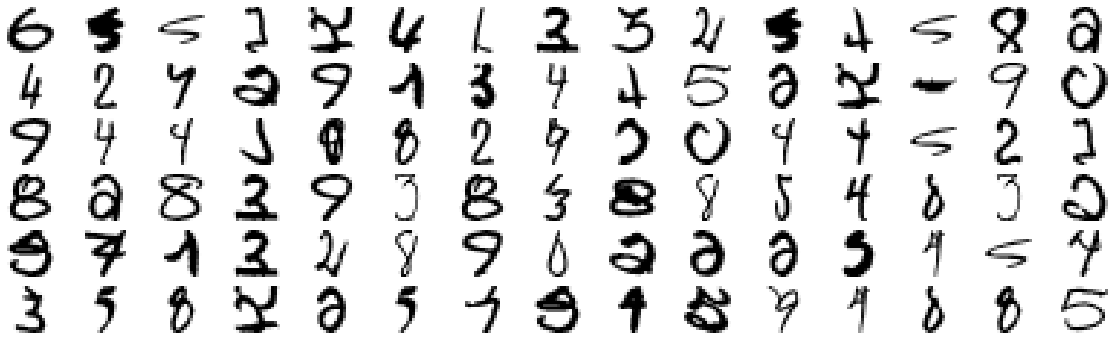

In [20]:
wrong = X_test[(results_test[3] != y_test)]
show_numbers(wrong)